# Imports

Zona de importação das bibliotecas utilizadas neste trabalho.

In [1]:
import pandas as pd
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import seaborn as sns
sns.set(color_codes=True)
from matplotlib import rcParams
from matplotlib import pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import scipy as sp
import scipy.stats as stats
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Importação do ficheiro

É utilizado a biblioteca "Pandas" por se proceder à importação do ficheiro "cardio.csv".
Neste ficheiro estão identificados indivídiuos, com determinados dados, que indicam se tem alguma doença cardiovascular ou não.
É feita uma primeira visualização de uma pequena amostra das primeiras linhas do dataframe, para ter uma ideia do conteúdo dos dados.

In [2]:
heart_disease = pd.read_csv('cardio_train.csv')
heart_disease.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Limpeza dos dados

Nesta fase é realizada o tratamento e a limpeza dos dados.

Como os dados da coluna "age" estão em dias, irá ser convertido para anos, para ser mais fácil de entender a idade de cada indivíduo. Ao executar esta converção, é necessário também converter o tipo de dados da coluna para o tipo inteiro (numpy int64). 
Remover-se-á a coluna "id" porque o index da biblioteca Pandas já tem a mesma finalidade que este campo, que é identificar univocamente cada linha.

In [3]:
heart_disease['age'] = round(heart_disease['age'] * 0.00273790926)
heart_disease = heart_disease.astype({'age': np.int64})

del heart_disease['id']
heart_disease.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


Podemos evidenciar que o dataframe tem 70000 dados, tem 12 colunas, todos os dados são do tipo numpy int64, à excepção dos dados da coluna "weight", que é do tipo numpy float64.

In [5]:
heart_disease.isnull().any()

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

O dataframe não tem quaisqueres missing values, i.e., None ou NaN ou Null.
Por esse motivo não é necessário proceder ao tratamento de missing values.

In [6]:
heart_disease.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.304271,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.760672,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Com a informação acima, podemos ter uma noção geral do dataframe.

In [7]:
heart_disease['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

Existem mais mulheres ("gender" = 1) do que homens ("gender" = 2).

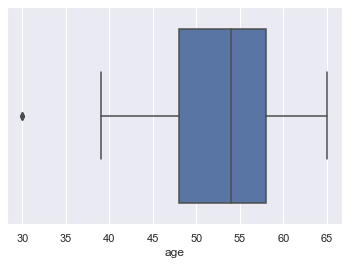

In [8]:
sns.boxplot(heart_disease['age'])

Verifica-se que a média de idades é aproximadamente 54 anos, o mínimo é 30 anos (apenas com 1 indivíduo) e o máximo 65 anos, logo podemos afirmar que temos uma amostra de indivíduos entre os 30 e os 65 anos.

Como apenas temos 1 indivíduo com 30 anos, iremos removê-lo.

In [9]:
heart_disease.drop(heart_disease[(heart_disease['age'] == 30)].index,inplace=True)

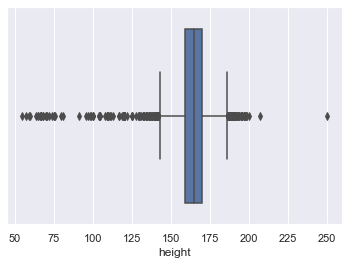

In [10]:
sns.boxplot(heart_disease['height'])

A altura varia entre 55 centimetros e 2 metros e 50 centimetros, sendo que a média é de 1 metro e 64 centimetros.

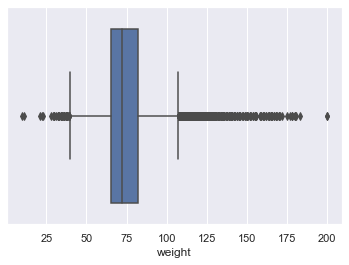

In [11]:
sns.boxplot(heart_disease['weight'])

O peso varia entre 10 kg e os 200 kg, em que a média são 74 kg.

Como se pôde constactar existem outliers, mais propriamente em relação à altura de 55 centimetros e 2 metros e 50 centimetros e o peso de 10 kg.
Por esse facto ir-se-á proceder à remoção dos mesmos.

In [12]:
heart_disease.drop(heart_disease[(heart_disease['height'] > heart_disease['height'].quantile(0.99999)) | (heart_disease['height'] < heart_disease['height'].quantile(0.0004))].index,inplace=True)
heart_disease.drop(heart_disease[(heart_disease['weight'] < heart_disease['weight'].quantile(0.001))].index,inplace=True)

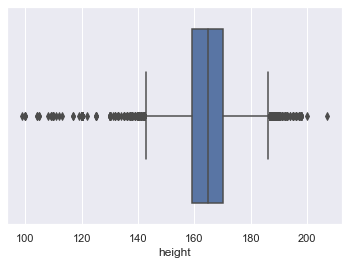

In [13]:
sns.boxplot(heart_disease['height'])

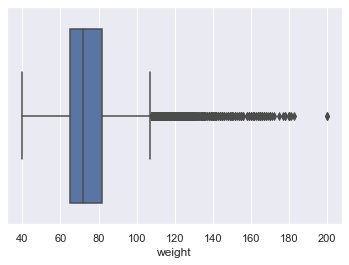

In [14]:
sns.boxplot(heart_disease['weight'])

Existem também outliers em relação à pressão arterial, valores em que a pressão diastólica ("ap_lo") é maior que a sistólica ("ap_hi"), valores negativos em ambos, valores demasiado elevados e demasiado baixos, e por isso vamos removê-los.

In [15]:
outliers = (heart_disease['ap_lo'] > heart_disease['ap_hi']).sum()

print("Existem {} casos em que pressão diastólica é maior que a sistólica".format(str(outliers)))

Existem 1229 casos em que pressão diastólica é maior que a sistólica


In [16]:
outliers = (heart_disease['ap_lo'] < 0).sum()
print("Existe {} caso em que pressão diastólica é negativa".format(str(outliers)))

Existe 1 caso em que pressão diastólica é negativa


In [17]:
outliers = (heart_disease['ap_hi'] < 0).sum()
print("Existem {} casos em que pressão diastólica é negativa".format(str(outliers)))

Existem 7 casos em que pressão diastólica é negativa


In [18]:
heart_disease.drop(heart_disease[(heart_disease['ap_hi'] > heart_disease['ap_hi'].quantile(0.975)) | (heart_disease['ap_hi'] < heart_disease['ap_hi'].quantile(0.025))].index,inplace=True)
heart_disease.drop(heart_disease[(heart_disease['ap_lo'] > heart_disease['ap_lo'].quantile(0.975)) | (heart_disease['ap_lo'] < heart_disease['ap_lo'].quantile(0.025))].index,inplace=True)

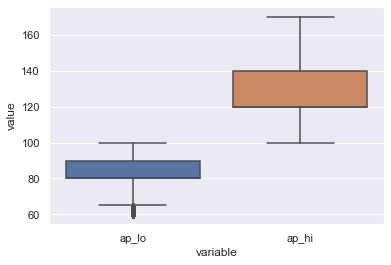

In [19]:
blood_pressure = heart_disease.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())

Vamos agora averiguar se existem duplicados.

In [20]:
print("Existem {} duplicados".format(heart_disease.duplicated().sum()))

Existem 3816 duplicados


Vamos visualizar alguns desses duplicados.

In [21]:
duplicated = heart_disease[heart_disease.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'], ascending= True)
duplicated.head(heart_disease.duplicated().sum())

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
37423,39,1,170,72.0,120,80,1,1,0,0,1,0
66714,39,1,170,72.0,120,80,1,1,0,0,1,0
5984,39,2,165,65.0,120,80,1,1,0,0,0,0
15114,39,2,165,65.0,120,80,1,1,0,0,0,0
4590,40,1,151,58.0,110,70,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
59415,54,2,168,75.0,120,80,1,1,0,0,1,0
36359,54,2,168,75.0,130,80,1,1,0,0,1,0
56763,54,2,168,75.0,130,80,1,1,0,0,1,0
46941,54,2,169,65.0,120,80,1,1,0,0,1,0


Como os duplicados não ajudam para a nossa análise são removidos.

In [22]:
heart_disease.drop_duplicates(inplace=True)

Após o tratamento e limpeza de dados ainda nos fica a faltar variáveis importantes neste tipo de caso de estudo, que são o Indice de Massa Corporal e a Pressão do Pulso.

In [23]:
heart_disease['bmi'] = heart_disease['weight'] / ((heart_disease['height'] * 0.01) ** 2)
heart_disease['pulse_pressure'] = heart_disease['ap_hi'] - heart_disease['ap_lo']

heart_disease.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse_pressure
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,30
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,50
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,50
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,40


# PairPlot

Com o pairplot vai ser possivel explorar correlações entre dados multidimensionais.

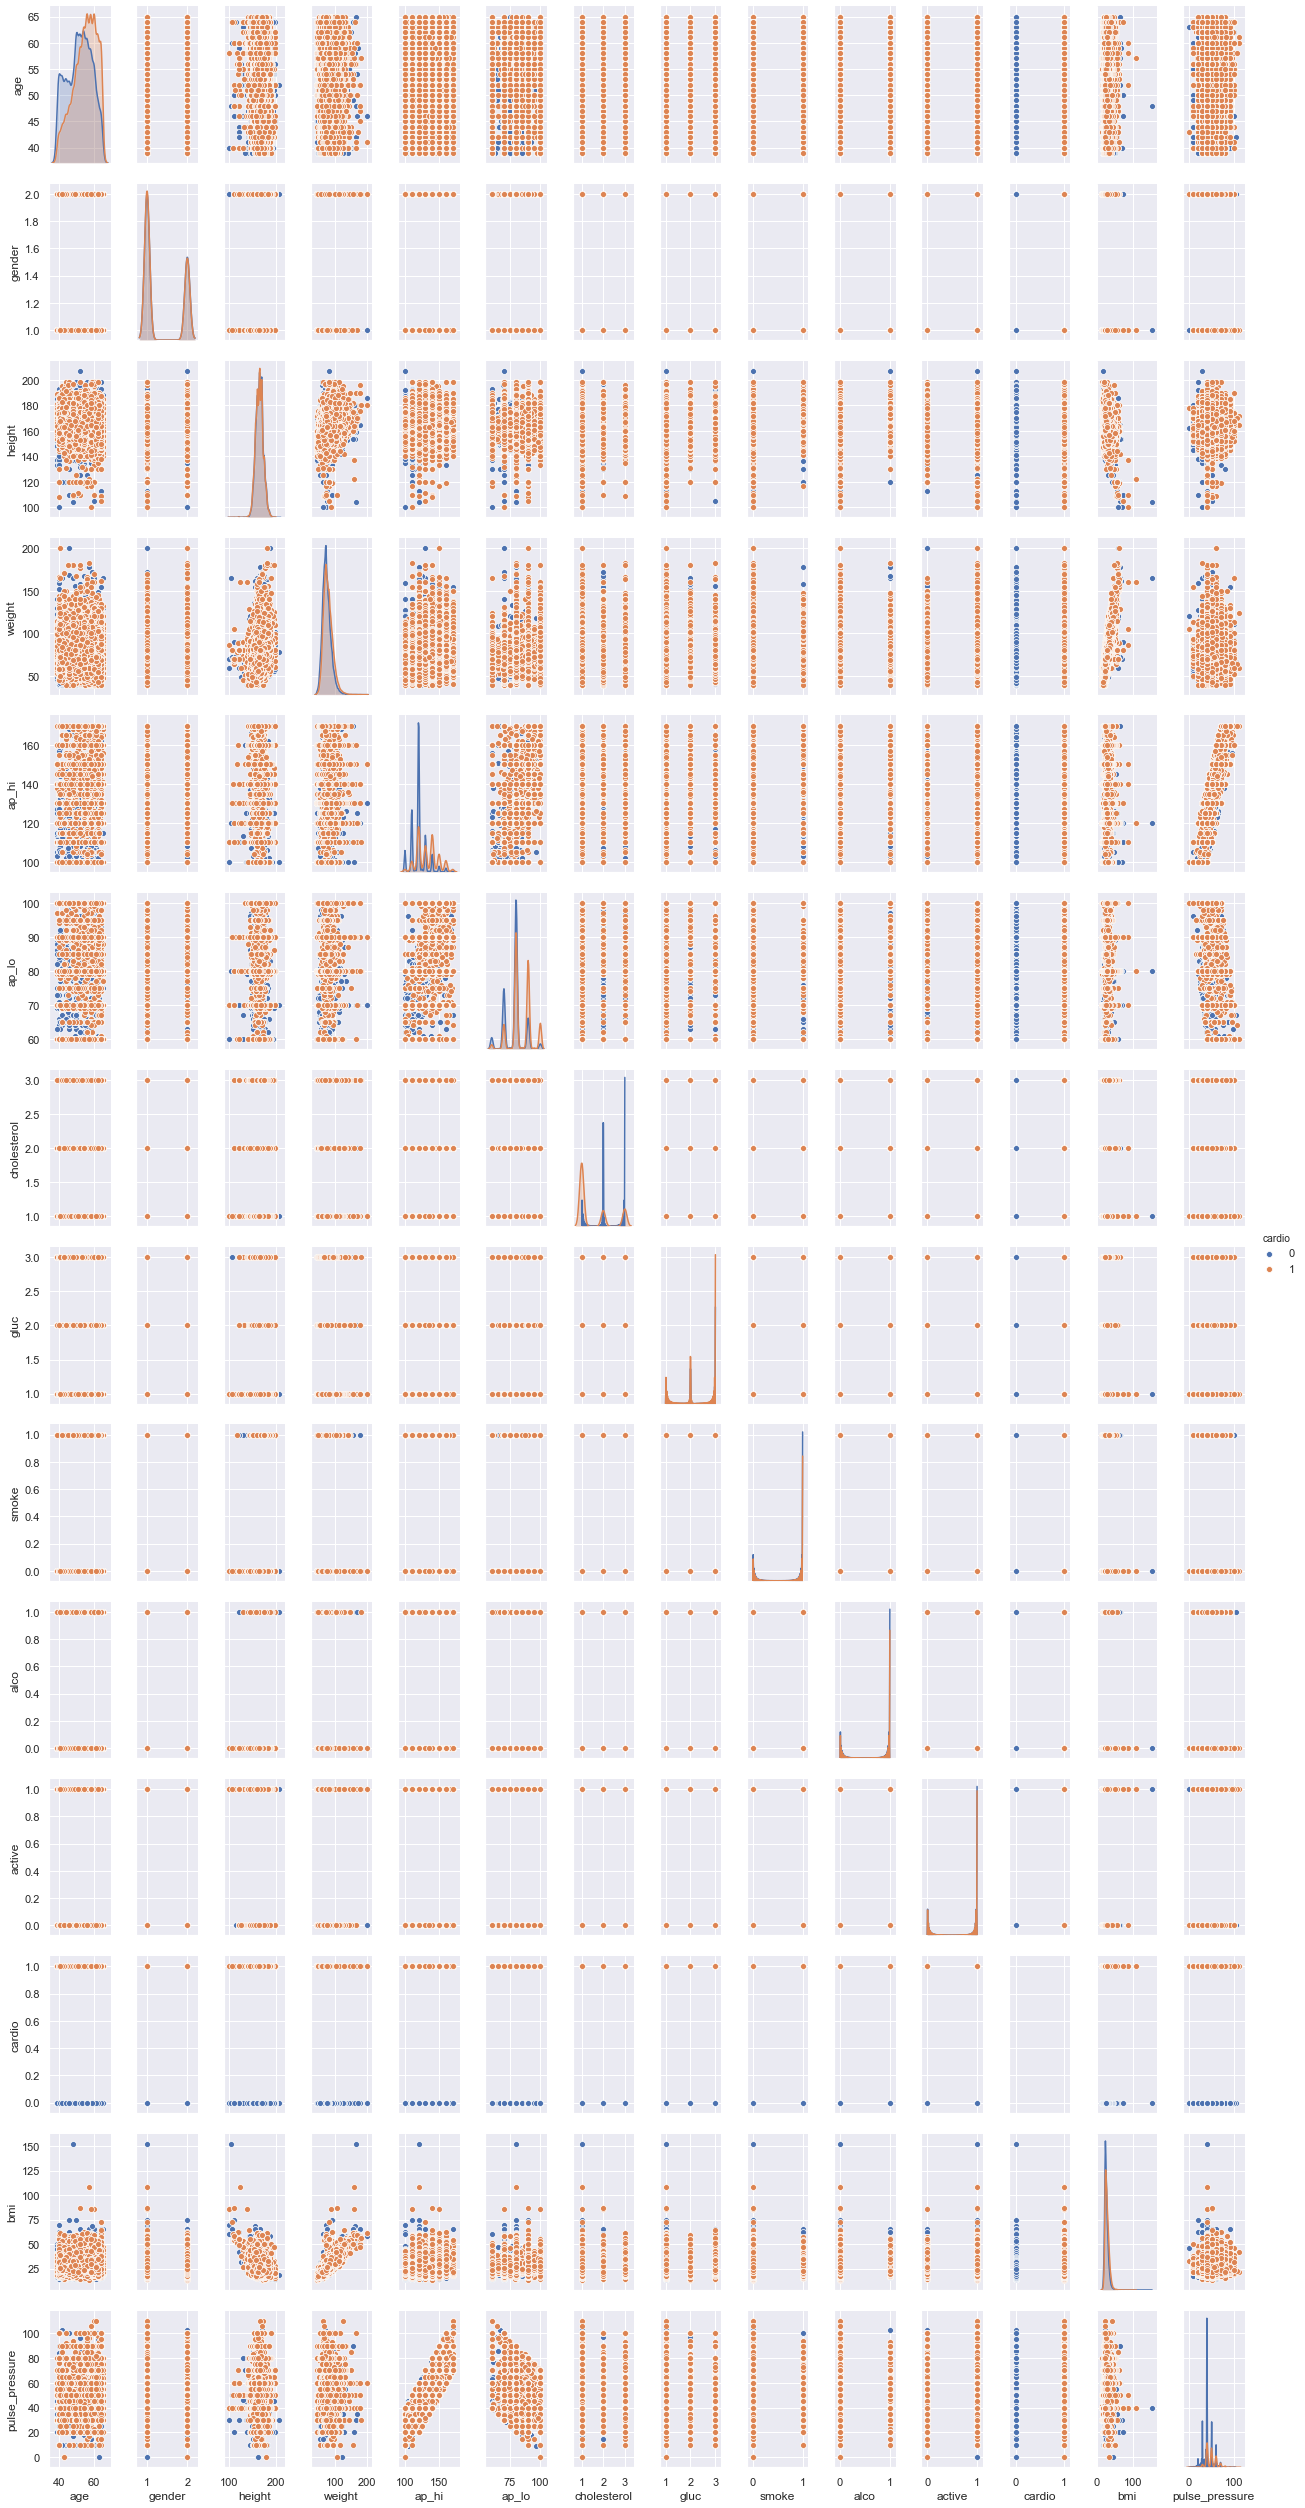

In [24]:
sns.pairplot(heart_disease, hue='cardio', aspect=0.5)

# HeatMap

O heatmap dá-nos a visualização de quais as variáveis com maior correlação.
Neste caso queremos saber quais as variáveis com maior correlação com a variável "cardio".

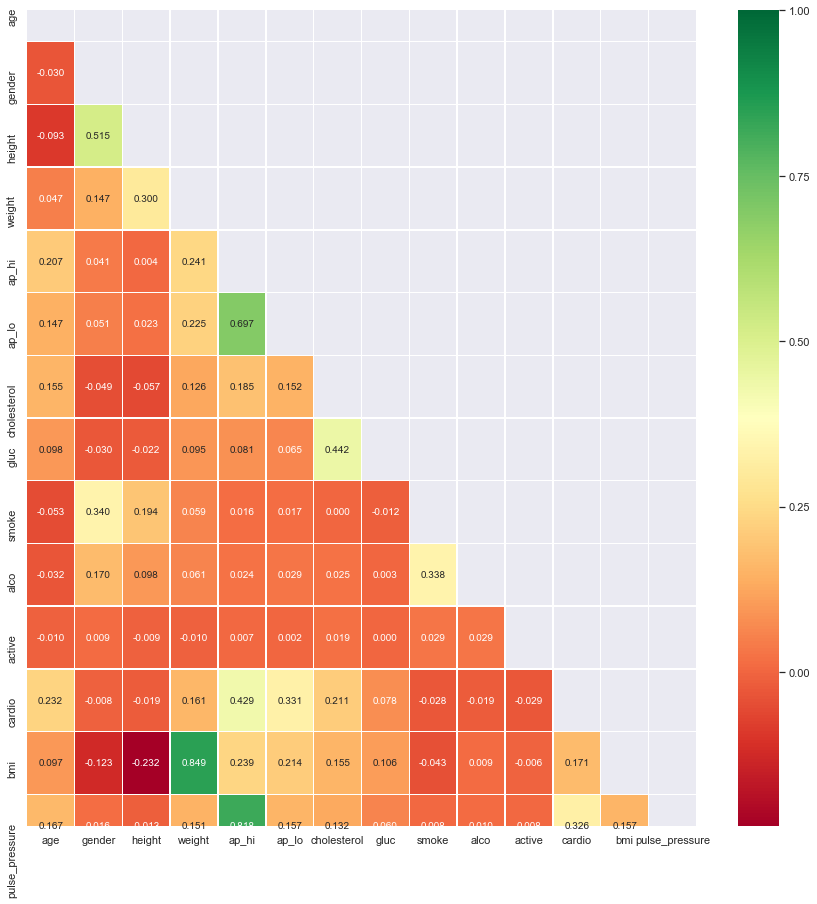

In [25]:
f, ax = plt.subplots(figsize = (15,15))
mask = np.zeros_like(heart_disease.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(heart_disease.corr(), mask=mask, annot=True, fmt=".3f", linewidths=0.5, ax=ax, cmap='RdYlGn')

Com isto podemos afirmar que pressão arterial (ap_hi e ap_lo), pressão do pulso têm uma maior correlação com cardio, i.e. têm maior relação com doenças cardiovasvulares. Existe uma grande correlação entre as pressões arteriais (ap_hi e ap_lo). Existe correlação entre as beber e fumar e entre colesterol e açúcar no sangue. Existe uma grande correlação entre peso e indice de massa corporal. Existe uma grande correlação entre a pressão sistólica ("ap_hi") e a pressão do pulso.

# GroupBy: Split, Apply, Combine

Iremos daqui em diante analisar os dados mais ao detalhe.
Com isto, iremos começar por agrupar "age" com "gender".

In [26]:
age_gender_bmi = heart_disease.groupby(['age', 'gender']).agg({'bmi': np.mean})

In [27]:
age_gender_bmi = age_gender_bmi[age_gender_bmi.bmi > 25]
age_gender_bmi

bmi
age gender           
39  1       27.120031
    2       26.538773
40  1       26.688123
    2       25.851458
41  1       26.698758
    2       26.290571
42  1       26.807830
    2       25.849505
43  1       27.124553
    2       26.749667
44  1       27.183140
    2       26.216106
45  1       27.340961
    2       26.891405
46  1       27.430715
    2       26.436912
47  1       27.811677
    2       26.720365
48  1       27.926426
    2       26.569573
49  1       27.364203
    2       26.595448
50  1       27.795875
    2       26.637727
51  1       27.786617
    2       26.908352
52  1       28.085503
    2       26.759529
53  1       27.904293
    2       26.603625
54  1       28.109837
    2       26.838318
55  1       28.047235
    2       27.151863
56  1       28.382253
    2       26.887091
57  1       28.395547
    2       26.921905
58  1       28.521528
    2       27.141799
59  1       28.927577
    2       26.726490
60  1       28.556107
    2       27.005981
61  1       29.243846
    2       26.815616
62  1       28.728649
    2       26.850575
63  1       28.791420
    2       27.037159
64  1       29.118348
    2       27.033041
65  1       27.808628
    2       26.569301

In [28]:
age_gender_bmi.pivot_table('bmi', index='age', columns='gender', aggfunc='mean')

gender,1,2
age,,
39,27.120031,26.538773
40,26.688123,25.851458
41,26.698758,26.290571
42,26.807830,25.849505
43,27.124553,26.749667
44,27.183140,26.216106
45,27.340961,26.891405
46,27.430715,26.436912
47,27.811677,26.720365


Text(0, 0.5, 'Mean bmi per age')

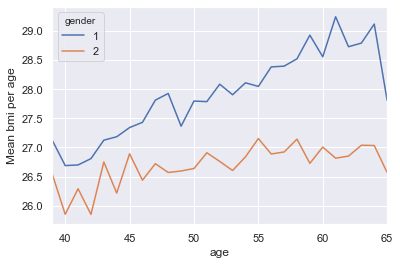

In [29]:
heart_disease.pivot_table('bmi', index='age', columns='gender', aggfunc='mean').plot()
plt.ylabel('Mean bmi per age')

Aplicou-se a média de "bmi" por "age" e "gender".
Em todas as idades e géneros têm uma média de Indice de Massa Corporal acima do normal, trata-se por normal Indice de Massa Corporal < 25.
As mulheres têm uma média de Indice de Massa Corporal superior à dos homens.
As mulheres com mais idade têm maior média de Indice de Massa Corpora.

In [30]:
age_gender_blood_pressure = heart_disease.groupby(['age', 'gender']).agg({'ap_hi': np.mean, 'ap_lo': np.mean})

In [31]:
age_gender_blood_pressure = age_gender_blood_pressure[age_gender_blood_pressure.ap_hi > 120]
age_gender_blood_pressure = age_gender_blood_pressure[age_gender_blood_pressure.ap_lo > 80]
age_gender_blood_pressure

ap_hi      ap_lo
age gender                       
41  2       123.047794  80.363971
43  2       124.820225  81.307116
44  2       124.380040  80.745968
45  2       124.958188  81.191638
46  2       124.470865  80.461466
47  1       124.876890  81.004320
    2       126.936567  82.201493
48  1       124.203199  80.233412
    2       125.312984  80.891660
49  1       124.573820  80.251142
    2       125.528455  81.078591
50  1       124.366827  80.257054
    2       126.329450  81.780583
51  1       124.762692  80.572609
    2       127.871287  82.400990
52  1       126.008624  81.040796
    2       127.540900  82.168041
53  1       124.646727  80.733634
    2       126.944186  81.986047
54  1       126.726677  81.377347
    2       127.601251  81.994881
55  1       126.649897  81.338809
    2       129.276507  82.829522
56  1       127.560455  81.620484
    2       128.680093  82.469352
57  1       128.330044  81.945175
    2       128.828829  82.353604
58  1       127.439925  81.647625
    2       129.610368  82.709030
59  1       129.414798  82.890135
    2       128.866310  81.906417
60  1       128.927201  81.984465
    2       130.437862  83.066967
61  1       129.534759  82.310160
    2       129.923274  82.327366
62  1       130.930549  82.810887
    2       130.442403  83.004240
63  1       130.830247  82.432099
    2       130.825843  83.146067
64  1       131.795837  82.958370
    2       131.188811  83.031857
65  1       128.544872  82.179487
    2       129.194175  81.825243

In [32]:
heart_disease.pivot_table('pulse_pressure', index='age', columns='gender', aggfunc='mean')

gender,1,2
age,,
39,42.446640,43.278409
40,40.986273,42.182327
41,41.691964,42.683824
42,42.133236,42.967021
43,42.930864,43.513109
44,42.463979,43.634073
45,42.861298,43.766551
46,43.272962,44.009398
47,43.872570,44.735075


Text(0, 0.5, 'Mean pulse pressure per age')

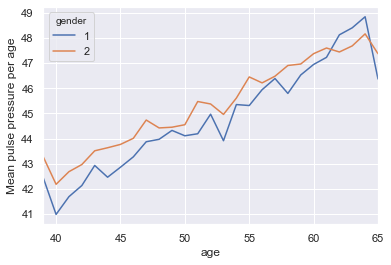

In [33]:
heart_disease.pivot_table('pulse_pressure', index='age', columns='gender', aggfunc='mean').plot()
plt.ylabel('Mean pulse pressure per age')

Aplicou-se a média de "ap_hi" e "ap_lo" por "age" e "gender".
Com esta pequena análise verifica-se que antes dos 41 anos não foram encontrados indivíduos com média de pressão arterial acima do normal, compreende-se acima do normal como pressão sistólica > 120 e pressão diastólica > 80.
Dos 41 aos 46 anos só os homens têm média de pressão arterial acima do normal.
A partir dos 47 anos tanto homens como mulheres têm média de pressão arterial acima do normal.
Indivíduos com mais idade têm mais média de pressão arterial.
Os homens no geral têm média de pressão arterial superior ao das mulheres.

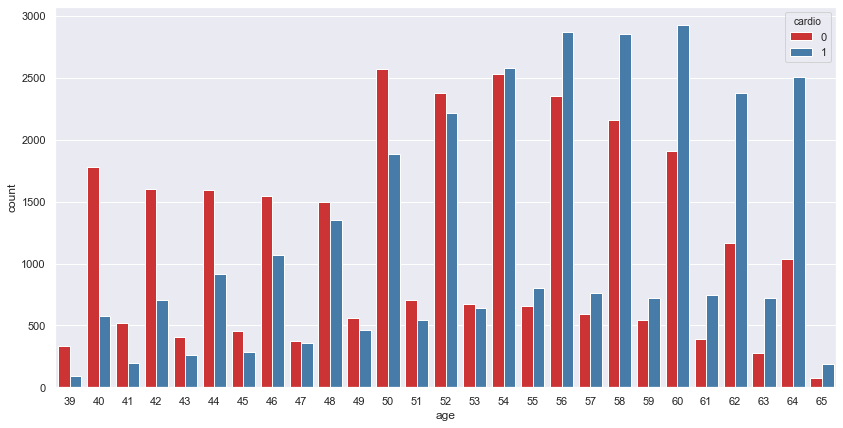

In [34]:
rcParams['figure.figsize'] = 14, 7
sns.countplot(x='age', hue='cardio', data = heart_disease, palette="Set1")

É visível que com o decorrer da idade, existe maior probabilidade de ter uma doença cardiovascular.
A partir dos 55 anos existem mais indivíduos com doenças cardiovasculares do que sem doenças cardiovasculares.

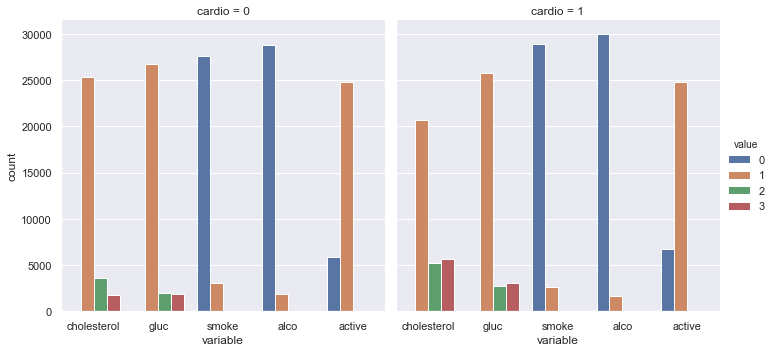

In [35]:
heart_disease_categories = pd.melt(heart_disease, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio", data=heart_disease_categories, kind="count")

Com esta informação ficamos com a ideia que pessoas com doenças cardiovasculares apresentam maiores níveis de colesterol fora do normal ("Cholesterol" = 2 ou "Cholesterol" = 3), maiores níveis de açucar no sangue ("gluc" = 2 ou "gluc" = 3) e fazem menos actividade física. Em relação aos níveis de consumo de tabaco e alcóol, não parece existir diferença.

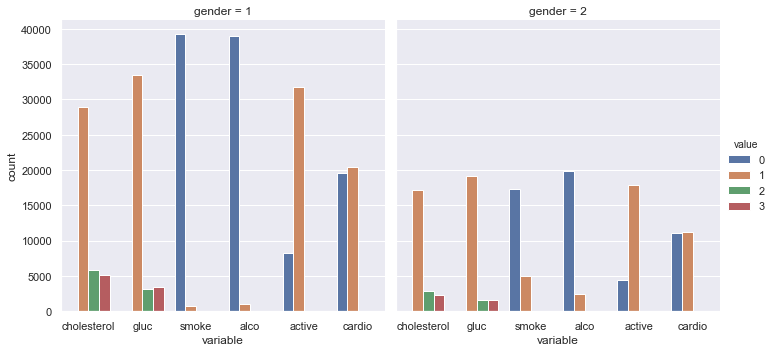

In [36]:
heart_disease_categories = pd.melt(heart_disease, id_vars=['gender'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'])
sns.catplot(x="variable", hue="value", col="gender", data=heart_disease_categories, kind="count")

Apesar de existirem mais mulheres do que homens, é visível que os homens consomem mais tabaco e alcóol que as mulheres. Em relação às doenças cardiovasculares, nas mulheres existem mais com doenças cardiovasculares e nos homens os valores são muito similares, apesar dos níveis serem praticamente quase iguais, dentro de cada género. Podemos visualizar abaixo todos os factos que mencionei.

In [37]:
heart_disease.groupby('gender')['smoke'].sum()

gender
1     754
2    5002
Name: smoke, dtype: int64

In [38]:
heart_disease.groupby('gender')['alco'].sum()

gender
1    1072
2    2416
Name: alco, dtype: int64

In [39]:
# womens
womens = (heart_disease['gender'] == 1).sum()
cholesterol = ((heart_disease['gender'] == 1) & (heart_disease['cholesterol'] != 1)).sum()
gluc = ((heart_disease['gender'] == 1) & (heart_disease['gluc'] != 1)).sum()
active = ((heart_disease['gender'] == 1) & (heart_disease['active'] == 1)).sum()

percentage_cholesterol = round(((cholesterol * 100)/womens),1)
percentage_gluc = round(((gluc * 100)/womens),1)
percentage_active = round(((active * 100)/womens),1)

print("Percentagem de mulheres com colesterol fora do normal: " + str(percentage_cholesterol) + "%")
print("Percentagem de mulheres com níveis de açúcar no sangue fora do normal: " + str(percentage_gluc) + "%")
print("Percentagem de mulheres que praticam actividades físicas: " + str(percentage_active) + "%")

Percentagem de mulheres com colesterol fora do normal: 27.7%
Percentagem de mulheres com níveis de açúcar no sangue fora do normal: 16.4%
Percentagem de mulheres que praticam actividades físicas: 79.4%


In [40]:
# mans
mans = (heart_disease['gender'] == 2).sum()
cholesterol = ((heart_disease['gender'] == 2) & (heart_disease['cholesterol'] != 1)).sum()
gluc = ((heart_disease['gender'] == 2) & (heart_disease['gluc'] != 1)).sum()
active = ((heart_disease['gender'] == 2) & (heart_disease['active'] == 1)).sum()

percentage_cholesterol = round(((cholesterol * 100)/mans),1)
percentage_gluc = round(((gluc * 100)/mans),1)
percentage_active = round(((active * 100)/mans),1)

print("Percentagem de homens com colesterol fora do normal: " + str(percentage_cholesterol) + "%")
print("Percentagem de homens com níveis de açúcar no sangue fora do normal: " + str(percentage_gluc) + "%")
print("Percentagem de homens que praticam actividades físicas: " + str(percentage_active) + "%")

Percentagem de homens com colesterol fora do normal: 23.2%
Percentagem de homens com níveis de açúcar no sangue fora do normal: 14.3%
Percentagem de homens que praticam actividades físicas: 80.2%


Existem mais mulheres do que homens com colesterol fora do normal e níveis de açúcar no sangue fora do normal, apesar dos valores estarem próximos.

(0, 80)

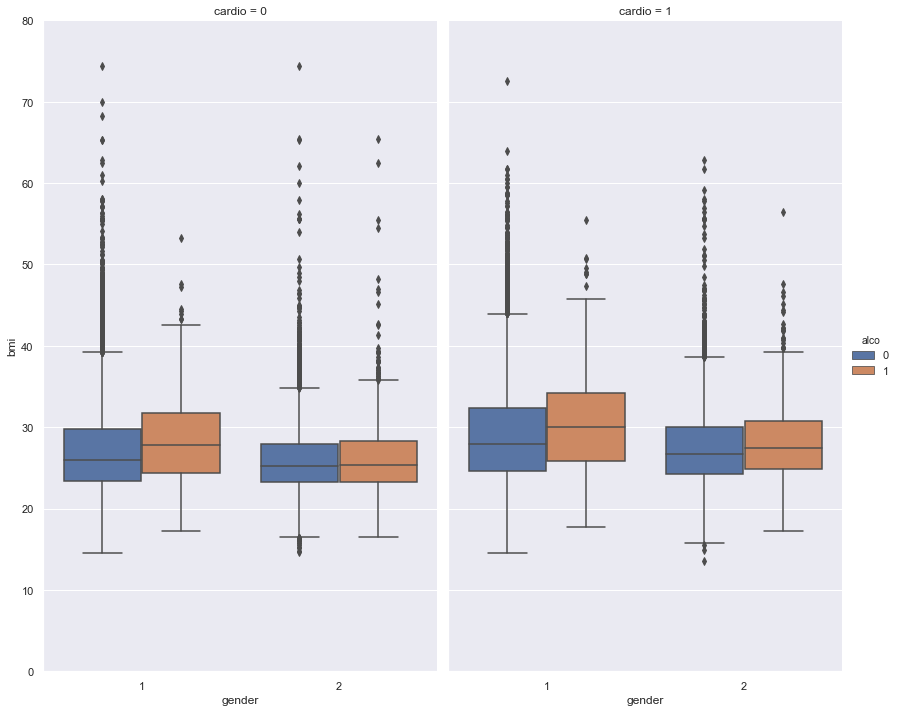

In [41]:
catplot = sns.catplot(x="gender", y="bmi", hue="alco", col="cardio", data=heart_disease ,kind="box", height=10, aspect=.6)
axes = catplot.axes
axes[0,0].set_ylim(0,80)

Mulheres que bebem têm mais riscos de ter doenças cardiovasculares do que os homens.

Vamos ver quais as médias das variáveis em relação ao "cardio".

In [42]:
heart_disease.groupby('cardio')[['age', 'gender', 'height', 'weight', 'bmi', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']].mean()

,age,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,,
0,51.743556,1.361889,164.615595,72.171421,26.674254,120.189253,78.394767,1.232917,1.190133,0.100655,0.060315,0.808922
1,54.904232,1.354577,164.310836,76.777172,28.496327,132.857138,84.077582,1.524511,1.280884,0.084351,0.051774,0.785312


Em média quem tem doenças cardiovasculares apresenta mais idade, mais peso, mais Indice de Massa Corporal, mais pressão arterial, mais colesterol, mais açúcar no sangue e faz menos actividade física.

Como já visto, as variáveis com maior impacto são "ap_hi", "ap_lo" e "pulse_pressure".
Com a ajuda do pairplot e do heatmap iremos descobrir quais as restantes variáveis que têm correlação com estas.
- "ap_hi" correlaciona-se com "pulse_pressure", "bmi", "ap_lo" e "weight";
- "ap_lo" correlaciona-se com "ap_hi", "bmi" e "weight";
- "pulse_pressure" correlaciona-se com "ap_hi".

# Regressão Linear

É realizada regressão linear entre as variáveis descritas.
É calculado o coeficiente de determinação, correlação de pearson e spearman entre as mesmas. 

Função que recebe 2 variáveis, e a partir dos valores das mesmas faz a regressão linear e calcula o coeficiente de determinação, correlação pearson e spearman.

In [43]:
def linear_regression(field_1, field_2):
    var_1 = heart_disease[field_1]
    var_2 = heart_disease[field_2]
    
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_1, var_2)
    heart_disease.plot(x=field_1, y=field_2, kind='scatter')
    plt.plot(var_1,var_1*slope+intercept,'r')
    plt.show()
    print ("r-squared : {}".format(r_value**2))
    print ("Pearson correlation : {}".format(pearsonr(var_1, var_2)[0]))
    print ("Spearman correlation : {}".format(spearmanr(var_1, var_2)[0]))

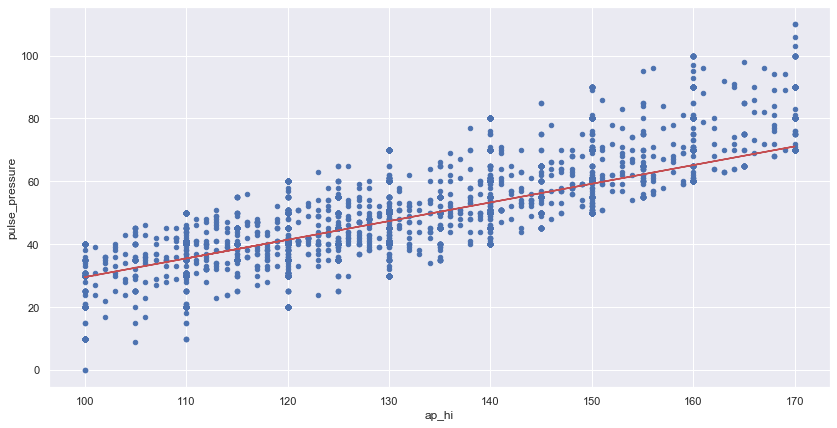

r-squared : 0.6685304154687419
Pearson correlation : 0.8176370927671677
Spearman correlation : 0.7947243592197586


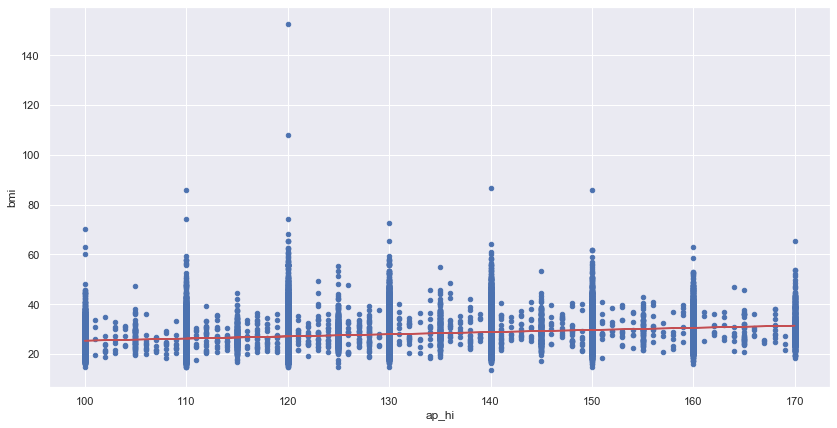

r-squared : 0.05705363638955206
Pearson correlation : 0.2388590303705349
Spearman correlation : 0.25923765469317656


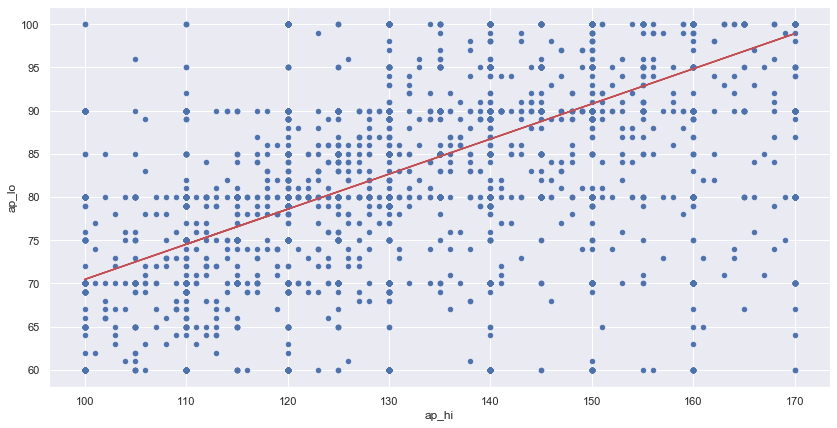

r-squared : 0.48540939834957825
Pearson correlation : 0.6967132827423204
Spearman correlation : 0.7182367636627984


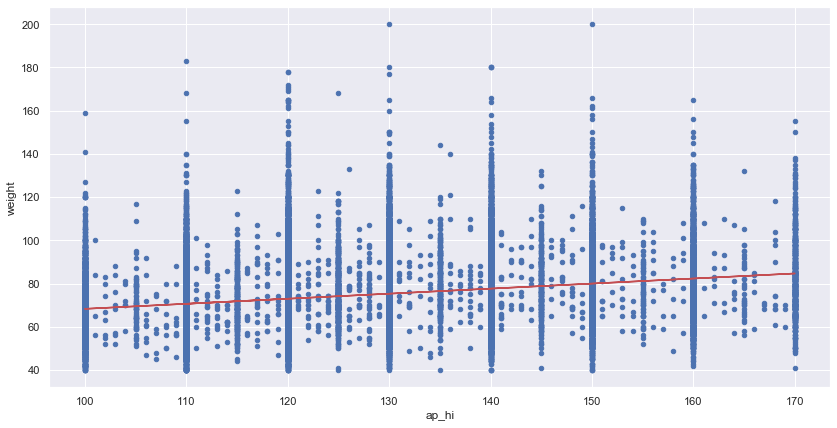

r-squared : 0.058120643264985256
Pearson correlation : 0.24108223340799148
Spearman correlation : 0.25179327955871394


In [44]:
#ap_hi
linear_regression('ap_hi', 'pulse_pressure')
linear_regression('ap_hi', 'bmi')
linear_regression('ap_hi', 'ap_lo')
linear_regression('ap_hi', 'weight')

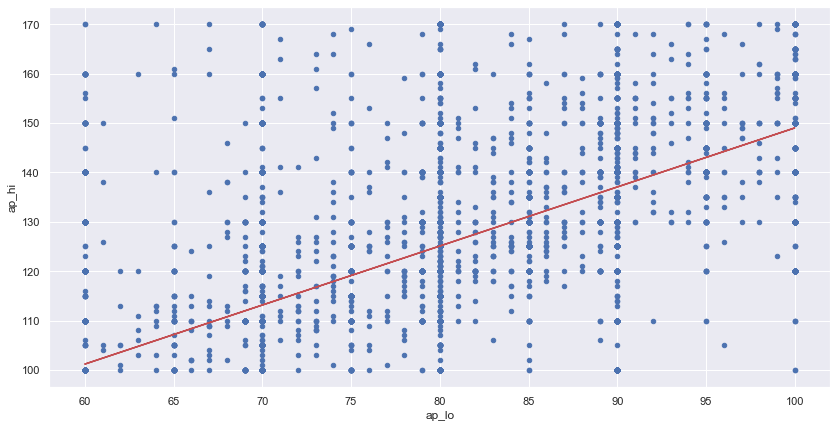

r-squared : 0.48540939834957825
Pearson correlation : 0.6967132827423204
Spearman correlation : 0.7182367636627984


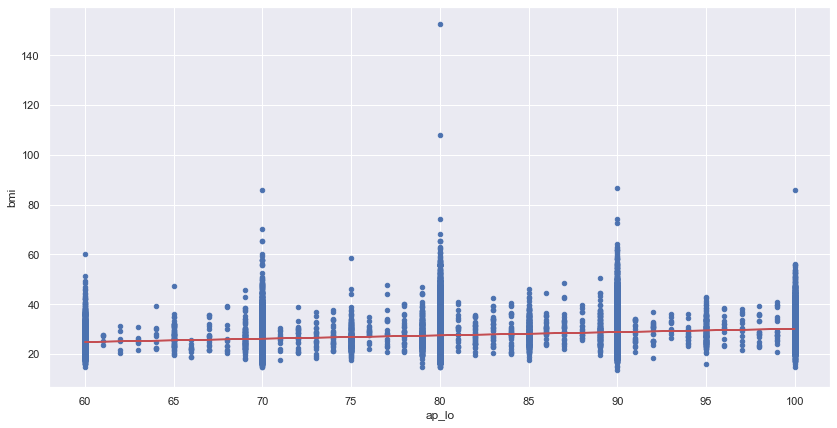

r-squared : 0.04579995238294068
Pearson correlation : 0.21400923434034475
Spearman correlation : 0.22817785707543192


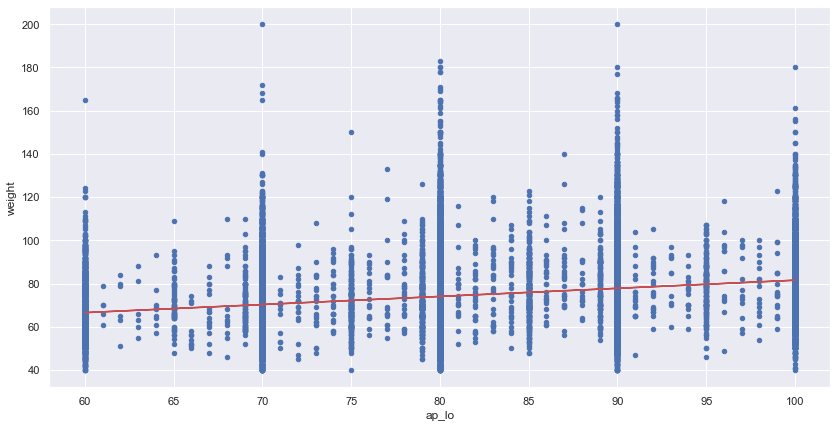

r-squared : 0.050825513092065545
Pearson correlation : 0.22544514430802348
Spearman correlation : 0.22831745663712494


In [45]:
#ap_lo
linear_regression('ap_lo', 'ap_hi')
linear_regression('ap_lo', 'bmi')
linear_regression('ap_lo', 'weight')

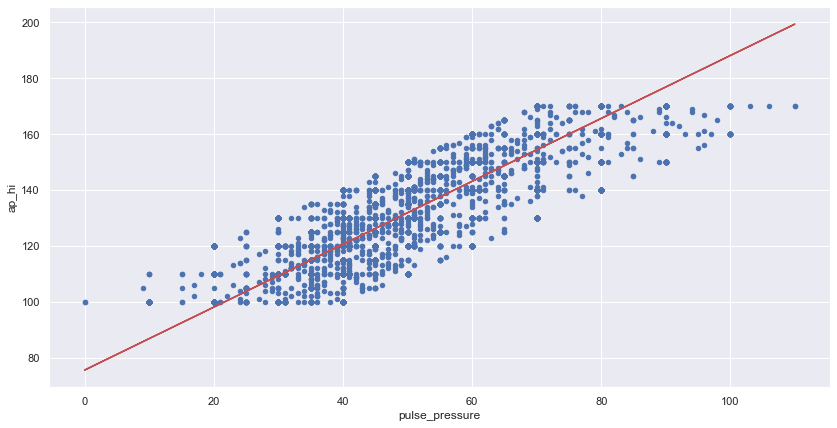

r-squared : 0.6685304154687419
Pearson correlation : 0.8176370927671677
Spearman correlation : 0.7947243592197586


In [46]:
#pulse_pressure
linear_regression('pulse_pressure', 'ap_hi')

Com esta a informação, permite-nos tirar algumas conclusãos, tais como:

O valor do campo "ap_hi" aumenta significativamente com o aumento dos campos "pulse_pressure" e "ap_lo" e aumenta ligeiramente com o aumento dos campos "bmi" e "weight".

O valor do campo "ap_lo" aumenta significativamente com o aumento do campo "ap_hi" e aumenta ligeiramente com o aumento dos campos "bmi" e "weight".

O valor do campo "pulse_pressure" aumenta significativamente com o aumento do campo "ap_hi".

# Teste Kolmogorov-Smirnov, CDF e ECDF

In [47]:
def distribution(field):
    var = heart_disease[field]
    sns.kdeplot(var, shade=True)
    return

In [48]:
cdfs = [
    "norm",            #Normal (Gaussian)
    "alpha",           #Alpha
    "anglit",          #Anglit
    "arcsine",         #Arcsine
    "beta",            #Beta
    "betaprime",       #Beta Prime
    "bradford",        #Bradford
    "burr",            #Burr
    "cauchy",          #Cauchy
    "chi",             #Chi
    "chi2",            #Chi-squared
    "cosine",          #Cosine
    "dgamma",          #Double Gamma
    "dweibull",        #Double Weibull
    "erlang",          #Erlang
    "expon",           #Exponential
    "exponweib",       #Exponentiated Weibull
    "exponpow",        #Exponential Power
    "fatiguelife",     #Fatigue Life (Birnbaum-Sanders)
    "foldcauchy",      #Folded Cauchy
    "f",               #F (Snecdor F)
    "fisk",            #Fisk
    "foldnorm",        #Folded Normal
    "frechet_r",       #Frechet Right Sided, Extreme Value Type II
    "frechet_l",       #Frechet Left Sided, Weibull_max
    "gamma",           #Gamma
    "gausshyper",      #Gauss Hypergeometric
    "genexpon",        #Generalized Exponential
    "genextreme",      #Generalized Extreme Value
    "gengamma",        #Generalized gamma
    "genlogistic",     #Generalized Logistic
    "genpareto",       #Generalized Pareto
    "genhalflogistic", #Generalized Half Logistic
    "gilbrat",         #Gilbrat
    "gompertz",        #Gompertz (Truncated Gumbel)
    "gumbel_l",        #Left Sided Gumbel, etc.
    "gumbel_r",        #Right Sided Gumbel
    "halfcauchy",      #Half Cauchy
    "halflogistic",    #Half Logistic
    "halfnorm",        #Half Normal
    "hypsecant",       #Hyperbolic Secant
    "invgamma",        #Inverse Gamma
    "invgauss",         #Inverse Normal
    "invweibull",      #Inverse Weibull
    "johnsonsb",       #Johnson SB
    "johnsonsu",       #Johnson SU
    "laplace",         #Laplace
    "logistic",        #Logistic
    "loggamma",        #Log-Gamma
    "loglaplace",      #Log-Laplace (Log Double Exponential)
    "lognorm",         #Log-Normal
    "lomax",           #Lomax (Pareto of the second kind)
    "maxwell",         #Maxwell
    "mielke",          #Mielke's Beta-Kappa
    "nakagami",        #Nakagami
    "ncx2",            #Non-central chi-squared
    "nct",             #Non-central Student's T
    "pareto",          #Pareto
    "powerlaw",        #Power-function
    "powerlognorm",    #Power log normal
    "powernorm",       #Power normal
    "rdist",           #R distribution
    "reciprocal",      #Reciprocal
    "rayleigh",        #Rayleigh
    "rice",            #Rice
    "recipinvgauss",   #Reciprocal Inverse Gaussian
    "semicircular",    #Semicircular
    "t",               #Student's T
    "triang",          #Triangular
    "truncexpon",      #Truncated Exponential
    "truncnorm",       #Truncated Normal
    "tukeylambda",     #Tukey-Lambda
    "uniform",         #Uniform
    "vonmises",        #Von-Mises (Circular)
    "wald",            #Wald
    "weibull_min",     #Minimum Weibull (see Frechet)
    "weibull_max",     #Maximum Weibull (see Frechet)
    "ksone",           #Kolmogorov-Smirnov one-sided (no stats)
    "kstwobign"]       #Kolmogorov-Smirnov two-sided test for Large N

In [49]:
def sk_test(field):
    var = heart_disease[field]
    sorted_field = np.sort(var)
    p_value = 0.05
    print(str(field.upper()) + "\n")
    for cdf in cdfs:
        parameters = eval("sp.stats."+cdf+".fit(sorted_field)")
        D, p = sp.stats.kstest(sorted_field, cdf, args=parameters)
        print ("Distribution: " + str(cdf.ljust(16)) + ("p: "+str(p)).ljust(25)+"D: "+str(D))
        if p < p_value:
            print("É rejeitada a hipótese nula\n")
        else:
            print("Não é rejeitada a hipótese nula\n")

In [50]:
def sk_plot_norm(field):
    var = heart_disease[field]
    length = len(var)
    mu = sp.mean(var)
    plt.figure(figsize=(12, 7))
    plt.plot(np.sort(var), np.linspace(0, 1, length), linewidth=3.0)
    plt.plot(np.sort(stats.norm.rvs(loc=mu, scale=5, size=length)), np.linspace(0, 1, length), linewidth=3.0, color="r")
    plt.legend('top right')
    plt.legend(['CDF', 'ECDF'])
    plt.title(field)
    plt.show()

In [51]:
def cdf(field):
    var = heart_disease[field]
    var.hist(cumulative = True)
    sorted_field = np.sort(var)
    plt.step(sorted_field, np.arange(sorted_field.size), linewidth=5.0, color="r")
    plt.show()

In [52]:
def sk_test_2samp(field):
    var = heart_disease[field]
    length = len(var)
    half_length = int((length/2)-0.5)
    first_half = var.loc[half_length:]
    second_half = var.loc[:half_length]
    p_value = 0.05
    sk_2samp = stats.ks_2samp(first_half, second_half)
    print (str(field.upper()) + "\n\n" + str(sk_2samp))
    if sk_2samp[1] < p_value:
        print("É rejeitada a hipótese nula")
    else:
        print("Não é rejeitada a hipótese nula")
        
    return first_half, second_half

In [53]:
def ks_plot_comp_cdf(field, first_half, second_half):
    mu_1 = sp.mean(first_half)
    mu_2 = sp.mean(second_half)
    plt.figure(figsize=(12, 7))
    
    if mu_1 > mu_2:
        diff_mu = mu_1 - mu_2
        plt.plot(np.sort(first_half), np.linspace(0, 1, len(first_half), endpoint=False), linewidth=3.0)
        plt.plot(np.sort(second_half + diff_mu), np.linspace(0, 1, len(second_half), endpoint=False), linewidth=3.0, color="r")
    if mu_1 < mu_2:
        diff_mu = mu_2 - mu_1
        plt.plot(np.sort(first_half + diff_mu), np.linspace(0, 1, len(first_half), endpoint=False), linewidth=3.0)
        plt.plot(np.sort(second_half), np.linspace(0, 1, len(second_half), endpoint=False), linewidth=3.0, color="r")
        
    plt.legend('top right')
    plt.legend(['First half', 'Second half'])
    plt.title('Comparing ' + str(field) + ' first half and fecond half CDFs')
    plt.xticks([])
    plt.show()

In [54]:
def ks_plot_comp_ecdf(field, first_half, second_half):
    mu_1 = sp.mean(first_half)
    mu_2 = sp.mean(second_half)
    plt.figure(figsize=(12, 7))
    
    if mu_1 > mu_2:
        diff_mu = mu_1 - mu_2
        plt.plot(np.sort(stats.norm.rvs(loc=first_half, scale=5, size=len(first_half))), np.linspace(0, 1, len(first_half), endpoint=False), linewidth=3.0, color="g")
        plt.plot(np.sort(stats.norm.rvs(loc=sp.mean(second_half + diff_mu), scale=5, size=len(second_half))), np.linspace(0, 1, len(second_half), endpoint=False), linewidth=3.0, color="orange")
    if mu_1 < mu_2:
        diff_mu = mu_2 - mu_1
        plt.plot(np.sort(stats.norm.rvs(loc=sp.mean(first_half + diff_mu), scale=5, size=len(first_half))), np.linspace(0, 1, len(first_half), endpoint=False), linewidth=3.0, color="g")
        plt.plot(np.sort(stats.norm.rvs(loc=second_half, scale=5, size=len(second_half))), np.linspace(0, 1, len(second_half), endpoint=False), linewidth=3.0, color="orange")
        
    plt.legend('top right')
    plt.legend(['First half', 'Second half'])
    plt.title('Comparing ' + str(field) + ' first half and fecond half ECDFs')
    plt.xticks([])
    plt.show()

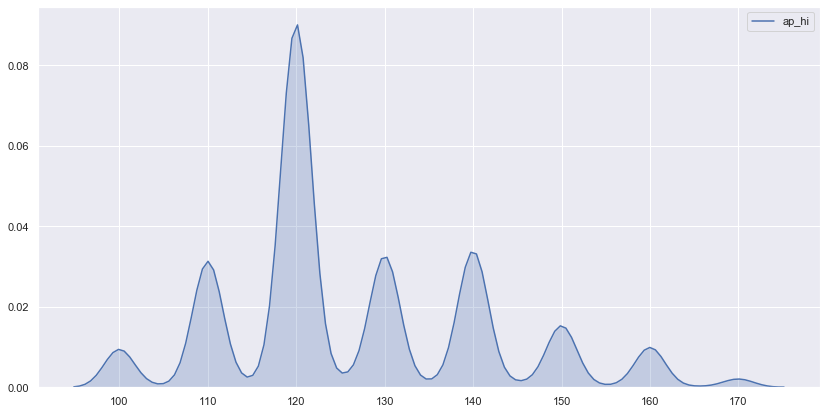

In [55]:
distribution('ap_hi')

In [56]:
sk_test('ap_hi')

AP_HI

Distribution: norm            p: 0.0                   D: 0.24567346279420454
É rejeitada a hipótese nula

Distribution: alpha           p: 0.0                   D: 0.21232540662153138
É rejeitada a hipótese nula

Distribution: anglit          p: 0.0                   D: 0.29479666828623385
É rejeitada a hipótese nula

Distribution: arcsine         p: 0.0                   D: 0.32966981717767607
É rejeitada a hipótese nula

Distribution: beta            p: 0.0                   D: 0.21021367255463175
É rejeitada a hipótese nula

Distribution: betaprime       p: 0.0                   D: 0.22745799440837244
É rejeitada a hipótese nula

Distribution: bradford        p: 0.0                   D: 0.21685782376242335
É rejeitada a hipótese nula

Distribution: burr            p: 0.0                   D: 0.20394041304975913
É rejeitada a hipótese nula

Distribution: cauchy          p: 0.0                   D: 0.25889377902574906
É rejeitada a hipótese nula

Distribution: chi             

Distribution: kstwobign       p: 0.0                   D: 0.20339599190840957
É rejeitada a hipótese nula



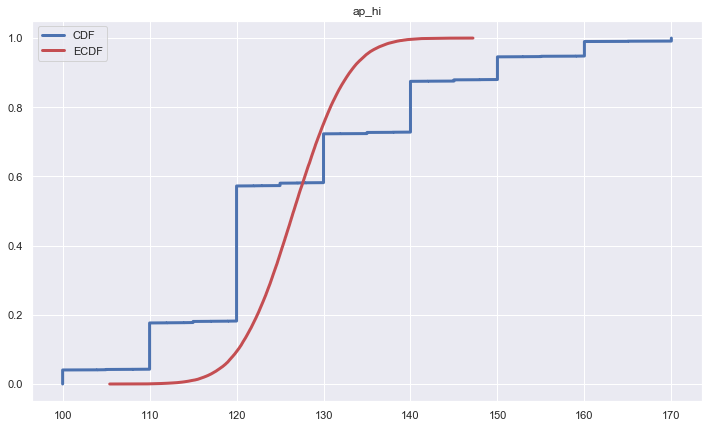

In [57]:
sk_plot_norm('ap_hi')

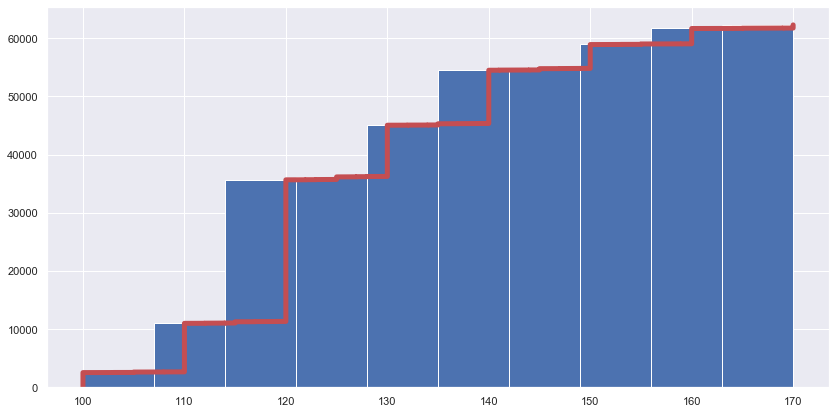

In [58]:
cdf('ap_hi')

In [59]:
first_half, second_half = sk_test_2samp('ap_hi')

AP_HI

Ks_2sampResult(statistic=0.020380677568609062, pvalue=5.296347604947104e-06)
É rejeitada a hipótese nula


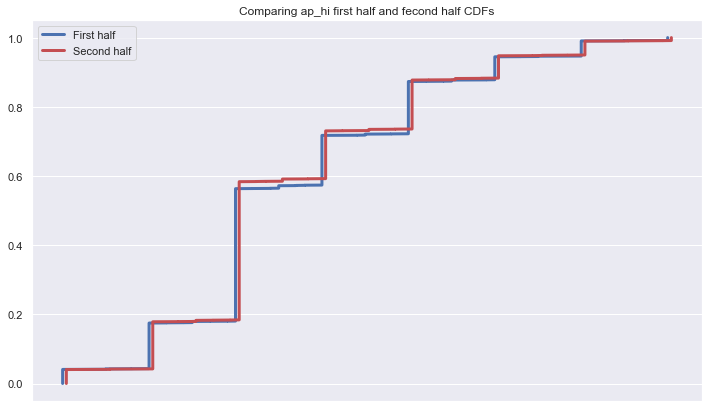

In [60]:
ks_plot_comp_cdf('ap_hi', first_half, second_half)

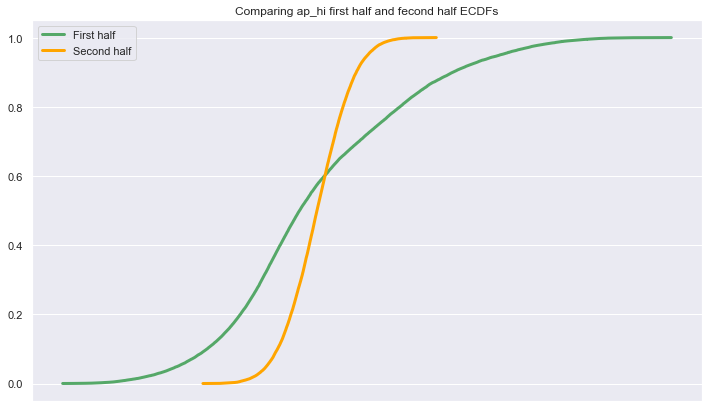

In [61]:
ks_plot_comp_ecdf('ap_hi', first_half, second_half)

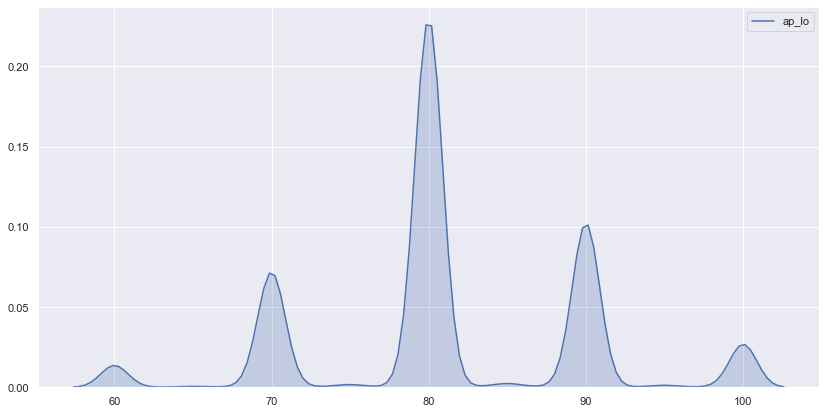

In [62]:
distribution('ap_lo')

In [63]:
sk_test('ap_lo')

AP_LO

Distribution: norm            p: 0.0                   D: 0.26311739281388447
É rejeitada a hipótese nula

Distribution: alpha           p: 0.0                   D: 0.25792932220552645
É rejeitada a hipótese nula

Distribution: anglit          p: 0.0                   D: 0.2726493149691821
É rejeitada a hipótese nula

Distribution: arcsine         p: 0.0                   D: 0.3259811673242925
É rejeitada a hipótese nula

Distribution: beta            p: 0.0                   D: 0.2617101926718272
É rejeitada a hipótese nula

Distribution: betaprime       p: 0.0                   D: 0.2639105525569665
É rejeitada a hipótese nula

Distribution: bradford        p: 0.0                   D: 0.3029073942193592
É rejeitada a hipótese nula

Distribution: burr            p: 0.0                   D: 0.2613968036611201
É rejeitada a hipótese nula

Distribution: cauchy          p: 0.0                   D: 0.29844961240310075
É rejeitada a hipótese nula

Distribution: chi             p: 0.0

Distribution: kstwobign       p: 0.0                   D: 0.3135482299064255
É rejeitada a hipótese nula



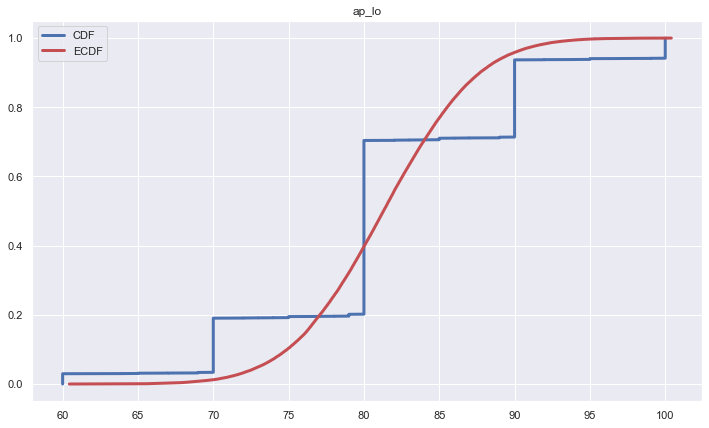

In [64]:
sk_plot_norm('ap_lo')

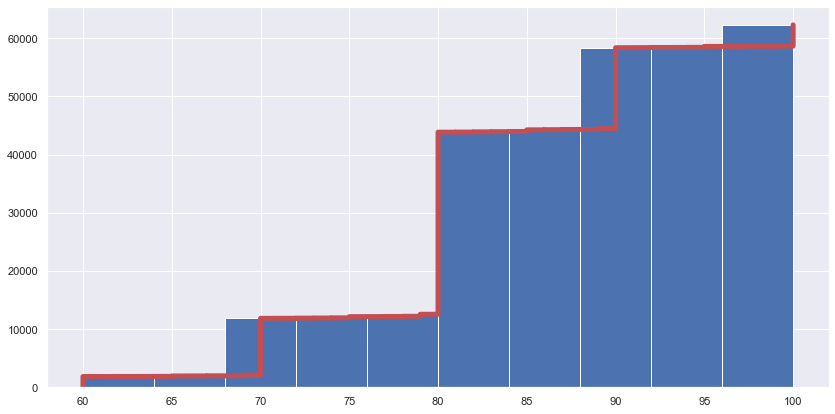

In [65]:
cdf('ap_lo')

In [66]:
first_half, second_half = sk_test_2samp('ap_lo')

AP_LO

Ks_2sampResult(statistic=0.014245304955670779, pvalue=0.003770316139718546)
É rejeitada a hipótese nula


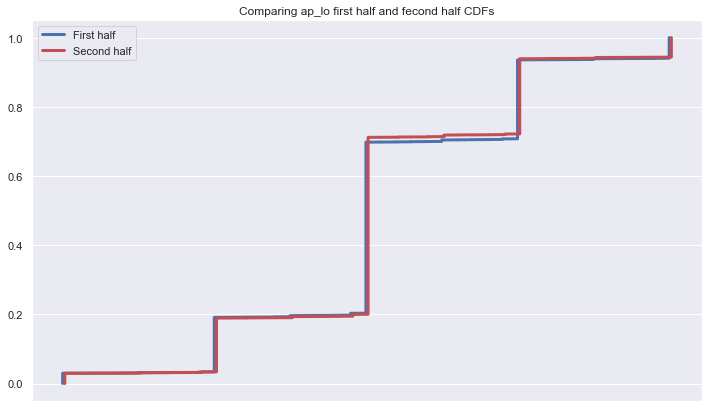

In [67]:
ks_plot_comp_cdf('ap_lo', first_half, second_half)

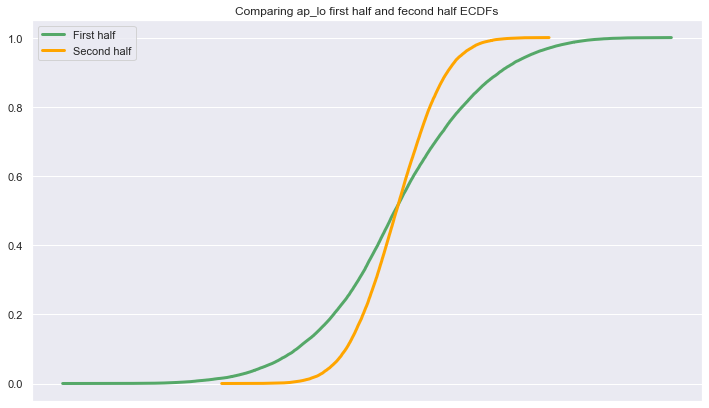

In [68]:
ks_plot_comp_ecdf('ap_lo', first_half, second_half)

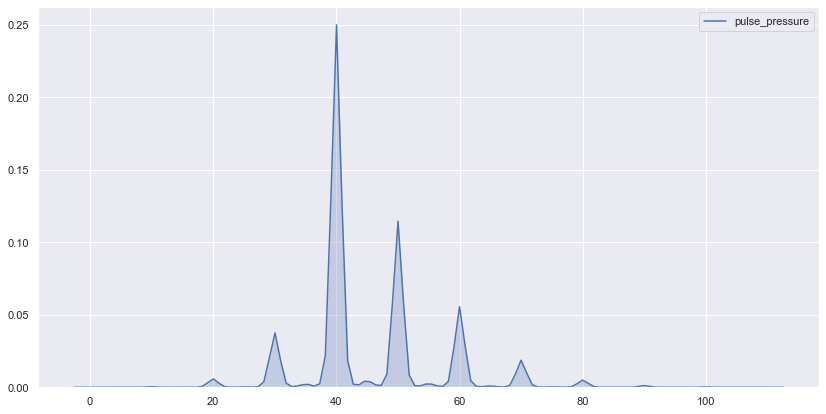

In [69]:
distribution('pulse_pressure')

In [70]:
sk_test('pulse_pressure')

PULSE_PRESSURE

Distribution: norm            p: 0.0                   D: 0.27784986860671984
É rejeitada a hipótese nula

Distribution: alpha           p: 0.0                   D: 0.2575949412556747
É rejeitada a hipótese nula

Distribution: anglit          p: 0.0                   D: 0.3983819562641764
É rejeitada a hipótese nula

Distribution: arcsine         p: 0.0                   D: 0.41543647408829054
É rejeitada a hipótese nula

Distribution: beta            p: 0.0                   D: 0.2663179752191802
É rejeitada a hipótese nula

Distribution: betaprime       p: 0.0                   D: 0.2584922554516806
É rejeitada a hipótese nula

Distribution: bradford        p: 0.0                   D: 0.35102984650566205
É rejeitada a hipótese nula

Distribution: burr            p: 0.0                   D: 0.26398136144185197
É rejeitada a hipótese nula

Distribution: cauchy          p: 0.0                   D: 0.3827129975954891
É rejeitada a hipótese nula

Distribution: chi         

Distribution: ksone           p: 0.0                   D: 0.4159781055047883
É rejeitada a hipótese nula

Distribution: kstwobign       p: 0.0                   D: 0.2855226611089221
É rejeitada a hipótese nula



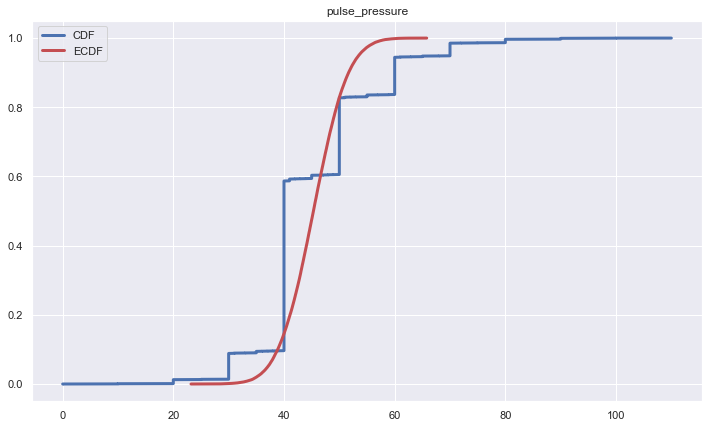

In [71]:
sk_plot_norm('pulse_pressure')

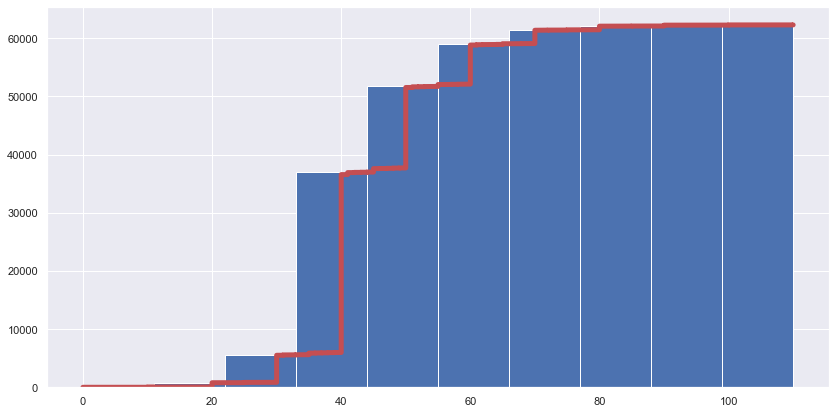

In [72]:
cdf('pulse_pressure')

In [73]:
first_half, second_half = sk_test_2samp('pulse_pressure')

PULSE_PRESSURE

Ks_2sampResult(statistic=0.019770636829736232, pvalue=1.129400397421102e-05)
É rejeitada a hipótese nula


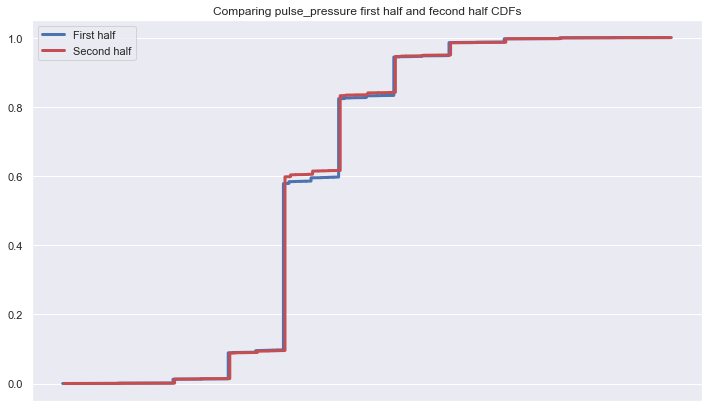

In [74]:
ks_plot_comp_cdf('pulse_pressure', first_half, second_half)

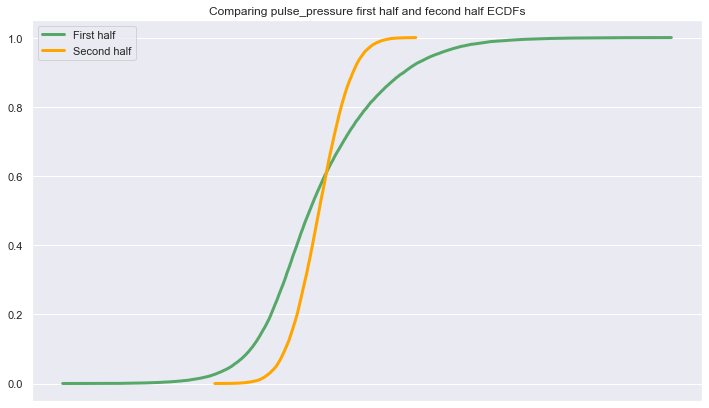

In [75]:
ks_plot_comp_ecdf('pulse_pressure', first_half, second_half)

Dada esta informação concluí-se que:

Visto que o valor p assume sempre o valor 0, i.e., valores tão baixos que arrendodados dão 0, é então rejeitada a hipotése nula. 
As distribuições de dados não seguem qualquer distribuição mencionada.